In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#####################################################
from src.config import DADOS_CATEGORIZADOS
from src.config import DADOS_TRATADOS
from src.modelos import (
    organiza_resultados,
    treinar_e_validar_modelo_regressao
)
#####################################################
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
#####################################################
sns.set_theme(palette='bright')
RANDOM_STATE = 42

In [2]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


In [4]:
X = df.drop(columns='target')
y = df['target']

In [5]:
regressors = {
    'DummyRegressor': DummyRegressor(strategy='mean'),
    'LinearRegression': LinearRegression()
}

resultados = {
    nome_modelo: treinar_e_validar_modelo_regressao(X, y, regressor)
    for nome_modelo, regressor in regressors.items()
}

In [6]:
resultados

{'DummyRegressor': {'fit_time': array([0.00701618, 0.00199962, 0.00353456, 0.00301862, 0.00402331]),
  'score_time': array([0.0054121 , 0.0030086 , 0.00299811, 0.00487113, 0.00545478]),
  'test_r2': array([-0.01196298, -0.02697753, -0.01530397, -0.00021233, -0.04231598]),
  'test_neg_mean_absolute_error': array([-64.00646147, -70.57793551, -59.82954545, -70.05392912,
         -65.42565485]),
  'test_neg_root_mean_squared_error': array([-73.22249284, -80.04318688, -74.33859714, -82.04745226,
         -76.3152967 ])},
 'LinearRegression': {'fit_time': array([0.2328887 , 0.00604057, 0.00401354, 0.00627089, 0.01726413]),
  'score_time': array([0.00753903, 0.00551677, 0.00403881, 0.00552869, 0.00624299]),
  'test_r2': array([0.45260233, 0.57320017, 0.39144844, 0.58428907, 0.39081192]),
  'test_neg_mean_absolute_error': array([-42.7940979 , -41.58260345, -47.22330093, -42.12233734,
         -47.62636566]),
  'test_neg_root_mean_squared_error': array([-53.85346603, -51.60075378, -57.55260468,

In [7]:
df_resultados = organiza_resultados(resultados)

df_resultados

,model,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,time_seconds
0,DummyRegressor,0.007016,0.005412,-0.011963,-64.006461,-73.222493,0.012428
1,DummyRegressor,0.002,0.003009,-0.026978,-70.577936,-80.043187,0.005008
2,DummyRegressor,0.003535,0.002998,-0.015304,-59.829545,-74.338597,0.006533
3,DummyRegressor,0.003019,0.004871,-0.000212,-70.053929,-82.047452,0.00789
4,DummyRegressor,0.004023,0.005455,-0.042316,-65.425655,-76.315297,0.009478
5,LinearRegression,0.232889,0.007539,0.452602,-42.794098,-53.853466,0.240428
6,LinearRegression,0.006041,0.005517,0.5732,-41.582603,-51.600754,0.011557
7,LinearRegression,0.004014,0.004039,0.391448,-47.223301,-57.552605,0.008052
8,LinearRegression,0.006271,0.005529,0.584289,-42.122337,-52.895016,0.0118
9,LinearRegression,0.017264,0.006243,0.390812,-47.626366,-58.342846,0.023507


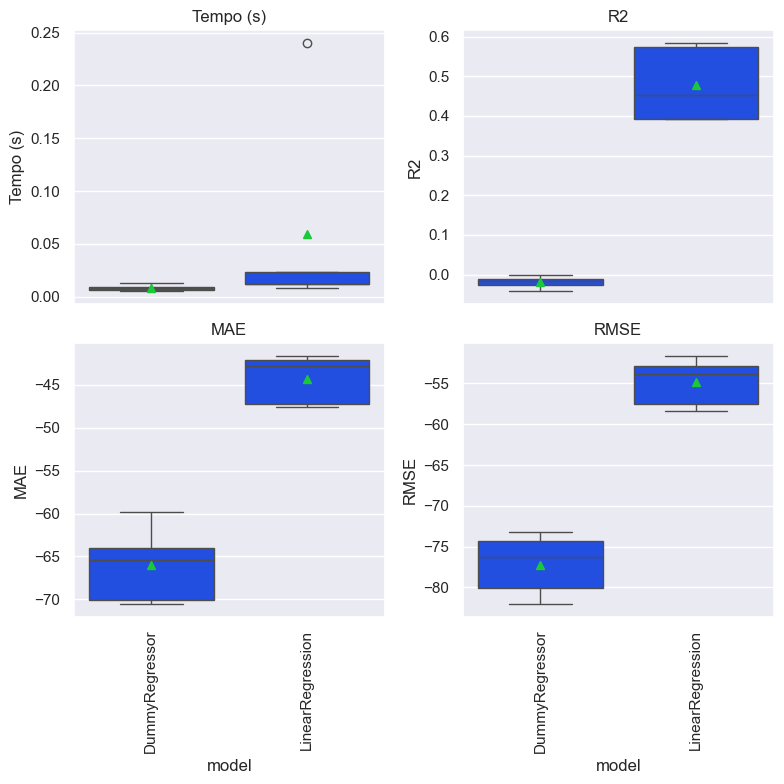

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharex=True)

comparar_metricas = [
    'time_seconds',
    'test_r2',
    'test_neg_mean_absolute_error',
    'test_neg_root_mean_squared_error'
]

nomes_metricas = [
    'Tempo (s)',
    'R2',
    'MAE',
    'RMSE'
]

for ax, metrica, nome in zip(axs.flatten(), comparar_metricas, nomes_metricas):
    sns.boxplot(
        x='model',
        y=metrica,
        data=df_resultados,
        ax=ax,
        showmeans=True
    )
    ax.set_title(nome)
    ax.set_ylabel(nome)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()